# **Import needed modules**

In [141]:
import random
import time
import math
import matplotlib.pyplot as plt
import numpy as np

# **Algorithms' partition**

In [142]:
def Partition(A,p,r):
    pivot = A[r]
    i=p-1
    for j in range(p,r):
        if A[j] <= pivot:
            i=i+1
            A[i],A[j] = A[j],A[i]
    if i<r:
        A[i+1],A[r] = A[r],A[i+1]
    return i+1

def Randomized_partition(A,p,r):
    i = random.randint(p,r)
    A[r],A[i] = A[i],A[r]
    return Partition(A,p,r)

def Partition_around(A,p,r,m):
    # Get index of m
    i = -1
    for j in range(p, r):
        if A[j] == m:
            i = j
            break
    # Swap m with last element in A
    A[i],A[r] = A[r],A[i]
    #Partition as usual
    return Partition(A,p,r)

# **Recursive methods**

In [143]:
def Randomized_select(A,p,r,i):
    if p==r: 
        return A[p]
    q = Randomized_partition(A,p,r)
    k = q-p +1
    if i==k : 
        return A[q]
    elif i<k:
        return Randomized_select(A,p,q-1,i)
    else: 
        return Randomized_select(A,q+1,r,i-k)

def Select(A,p,r,i,G):
    #print(A)
    if p==r:
        return A[p]
    
    while (r-p+1)%G!=0:
        for j in range(p+1,r+1):
            if A[p] > A[j]:
                A[p],A[j] = A[j],A[p]
        if i==1:
            return A[p]
        p=p+1
        i=i-1
    g = (r-p+1)//G
    #sort
    for j in range(p,p+g):
        if G == 3:
            selected_indices = [j,j+g,j+2*g]
        elif G == 5:
            selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g]
        elif G == 7:
            selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g,j+5*g,j+6*g]
        elif G == 9:
            selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g,j+5*g,j+6*g,j+7*g,j+8*g]
        selected_numbers = [A[x] for x in selected_indices if x <= r]
        selected_numbers.sort()
        for index, value in zip(selected_indices, selected_numbers):
            if index <= r:
                A[index] = value
    m = Select(A,p+2*g,((p+(3*g))-1),g//2,G)
    q = Partition_around(A,p,r,m)
    k = q-p+1
    if i==k:
        return A[q]
    elif i<k:
        return Select(A,p,q-1,i,G)
    else :
        return Select(A,q+1,r,i-k,G)

# **Iterative methods**

In [144]:
def Iterative_randomized_select(A,p,r,i):
    ans=-1
    while(ans==-1):
        if p==r:
            ans = A[p]
        q = Randomized_partition(A,p,r)
        k=q-p+1
        if i==k:
            ans = A[q]
        if i<k:
            r=q-1
        elif i>k:
            p=q+1
            i=i-k
    return ans

def Iterative_select(A,p,r,i,G):
    ans=-1
    while(ans==-1):
        #print(f"A1:{A}")
        while((r-p+1)%G!=0):
            for j in range(p+1,r+1):
                if A[p] > A[j]:
                    A[p],A[j] = A[j],A[p]
            if i==1:
                ans = A[p]
            p=p+1
            i=i-1
        g = (r-p+1)//G
        # sort
        for j in range(p,p+g):
            if G == 3:
                selected_indices = [j,j+g,j+2*g]
            elif G == 5:
                selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g]
            elif G == 7:
                selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g,j+5*g,j+6*g]
            elif G == 9:
                selected_indices = [j,j+g,j+2*g,j+3*g,j+4*g,j+5*g,j+6*g,j+7*g,j+8*g]
            selected_numbers = [A[x] for x in selected_indices if x <= r]
            selected_numbers.sort()
            for index, value in zip(selected_indices, selected_numbers):
                if index <= r:
                    A[index] = value
        #end sort
        #print(f"A2:{A}")
        # Get median of medians
        if g:
            medians = []
            for j in range(g):
                start = p + j*G
                end = min(start + G, r)
                # print(f"start:{start} , end:{end}")
                group = A[start:end+1]
                group.sort()
                # print(group)
                median = group[math.ceil(len(group)/2)]
                medians.append(median)
            
            if g%2 ==0:
                x = medians[(g//2) -1]
            else:
                x = medians[g//2]
        # print(f"m={medians},p={p},r={r},g={g}")
        # print(f"x:{x}")
        # Done, x = median of medians

        q = Partition_around(A,p,r,x)

        k = q-p+1

        if i==k:
            ans=A[q]
        elif i<k:
            r = q-1
        elif i>k:
            p=q+1
            i=i-k
    return ans

# **Calculate time**

In [145]:
def Calculate_time(N,K,elements,cnt):
    # print(elements.copy(),"K",K)
    start_time = time.time()
    Randomized_select(elements.copy(),0,N-1,K)
    end_time = time.time()
    rr_time = end_time - start_time
    RRandom_time.append(rr_time)

    start_time = time.time()
    Select(elements.copy(),0,N-1,K,3)
    end_time = time.time()
    r3_time = end_time - start_time
    RSelect_3_time.append(r3_time)

    start_time = time.time()
    Select(elements.copy(),0,N-1,K,5)
    end_time = time.time()
    r5_time = end_time - start_time
    RSelect_5_time.append(r5_time)

    start_time = time.time()
    Select(elements.copy(),0,N-1,K,7)
    end_time = time.time()
    r7_time = end_time - start_time
    RSelect_7_time.append(r7_time)

    start_time = time.time()
    Select(elements.copy(),0,N-1,K,9)
    end_time = time.time()
    r9_time = end_time - start_time
    RSelect_9_time.append(r9_time)

    start_time = time.time()
    Iterative_randomized_select(elements.copy(),0,N-1,K)
    end_time = time.time()
    ir_time = end_time - start_time
    IRandom_time.append(ir_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,3)
    end_time = time.time()
    i3_time = end_time - start_time
    ISelect_3_time.append(i3_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,5)
    end_time = time.time()
    i5_time = end_time - start_time
    ISelect_5_time.append(i5_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,7)
    end_time = time.time()
    i7_time = end_time - start_time
    ISelect_7_time.append(i7_time)

    start_time = time.time()
    Iterative_select(elements.copy(),0,N-1,K,9)
    end_time = time.time()
    i9_time = end_time - start_time
    ISelect_9_time.append(i9_time)

    print(f"Round{cnt}: RRandom:{rr_time:.2f} , R3:{r3_time:.2f} , R5:{r5_time:.2f} , R7:{r7_time:.2f} , R9:{r9_time:.2f}")
    print(f"Round{cnt}: IRandom:{ir_time:.2f} , I3:{i3_time:.2f} , I5:{i5_time:.2f} , I7:{i7_time:.2f} , I9:{i9_time:.2f}")


In [146]:
N=[]
for i in range(3,8):
    for j in range(10):
        # r_n = random.randint(10*i,10**i)
        r_n = 10**i
        N.append(r_n)
N.sort()
print(N)

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000, 10000000]


In [147]:
# Calculate time
RRandom_time=[]
RSelect_3_time=[]
RSelect_5_time=[]
RSelect_7_time=[]
RSelect_9_time=[]
IRandom_time=[]
ISelect_3_time=[]
ISelect_5_time=[]
ISelect_7_time=[]
ISelect_9_time=[]
for i in range(50):
    K = random.randint(1,N[i]+1)
    random_numbers = [random.randint(1, N[i]+1) for _ in range(N[i])]
    Calculate_time(N[i],K,random_numbers,i+1)
All_time=[]
All_time.append(RRandom_time)
All_time.append(RSelect_3_time)
All_time.append(RSelect_5_time)
All_time.append(RSelect_7_time)
All_time.append(RSelect_9_time)
All_time.append(IRandom_time)
All_time.append(ISelect_3_time)
All_time.append(ISelect_5_time)
All_time.append(ISelect_7_time)
All_time.append(ISelect_9_time)

print(All_time)

Round1: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round1: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round2: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round2: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round3: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round3: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round4: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round4: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round5: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round5: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round6: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round6: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round7: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round7: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round8: RRandom:0.00 , R3:0.00 , R5:0.00 , R7:0.00 , R9:0.00
Round8: IRandom:0.00 , I3:0.00 , I5:0.00 , I7:0.00 , I9:0.00
Round9: RRandom:0.00 , R

# **Plot graphs**

## **All time**

50 50


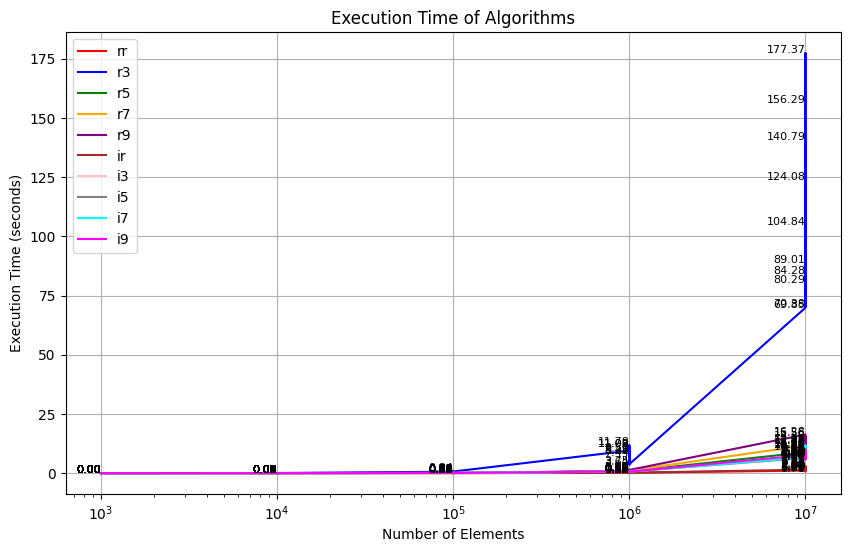

In [169]:
plt.figure(figsize=(10, 6))
# print(len(All_time))
colors = ['red', 'blue', 'green', 'orange', 'purple','brown','pink','gray','cyan','magenta'] 
Alo = ['rr','r3','r5','r7','r9','ir','i3','i5','i7','i9']
print(len(N),len(All_time[0]))
for i in range(10):
    plt.plot(N, All_time[i], color=colors[i], label=f'{Alo[i]}')
    for j in range(len(N)):
        plt.text(N[j], All_time[i][j], f'{All_time[i][j]:.2f}', fontsize=8, ha='right')

plt.title('Execution Time of Algorithms')
plt.xlabel('Number of Elements')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

In [152]:
All_avg=[]
avg_rr_time=[]
avg_r3_time=[]
avg_r5_time=[]
avg_r7_time=[]
avg_r9_time=[]
avg_ir_time=[]
avg_i3_time=[]
avg_i5_time=[]
avg_i7_time=[]
avg_i9_time=[]
for i in range(5):
    avg_rr = avg_r3 = avg_r5 = avg_r7 = avg_r9 = 0
    avg_ir = avg_i3 = avg_i5 = avg_i7 = avg_i9 = 0
    for j in range(10):
        avg_rr += RRandom_time[i*10 + j]
        avg_r3 += RSelect_3_time[i*10 + j]
        avg_r5 += RSelect_5_time[i*10 + j]
        avg_r7 += RSelect_7_time[i*10 + j]
        avg_r9 += RSelect_9_time[i*10 + j]
        avg_ir += IRandom_time[i*10 + j]
        avg_i3 += ISelect_3_time[i*10 + j]
        avg_i5 += ISelect_5_time[i*10 + j]
        avg_i7 += ISelect_7_time[i*10 + j]
        avg_i9 += ISelect_9_time[i*10 + j]
    avg_rr_time.append(round(float(avg_rr/10),2))
    avg_r3_time.append(round(float(avg_r3/10),2))
    avg_r5_time.append(round(float(avg_r5/10),2))
    avg_r7_time.append(round(float(avg_r7/10),2))
    avg_r9_time.append(round(float(avg_r9/10),2))
    avg_ir_time.append(round(float(avg_ir/10),2))
    avg_i3_time.append(round(float(avg_i3/10),2))
    avg_i5_time.append(round(float(avg_i5/10),2))
    avg_i7_time.append(round(float(avg_i7/10),2))
    avg_i9_time.append(round(float(avg_i9/10),2))
All_avg.append(avg_rr_time)
All_avg.append(avg_r3_time)
All_avg.append(avg_r5_time)
All_avg.append(avg_r7_time)
All_avg.append(avg_r9_time)
All_avg.append(avg_ir_time)
All_avg.append(avg_i3_time)
All_avg.append(avg_i5_time)
All_avg.append(avg_i7_time)
All_avg.append(avg_i9_time)

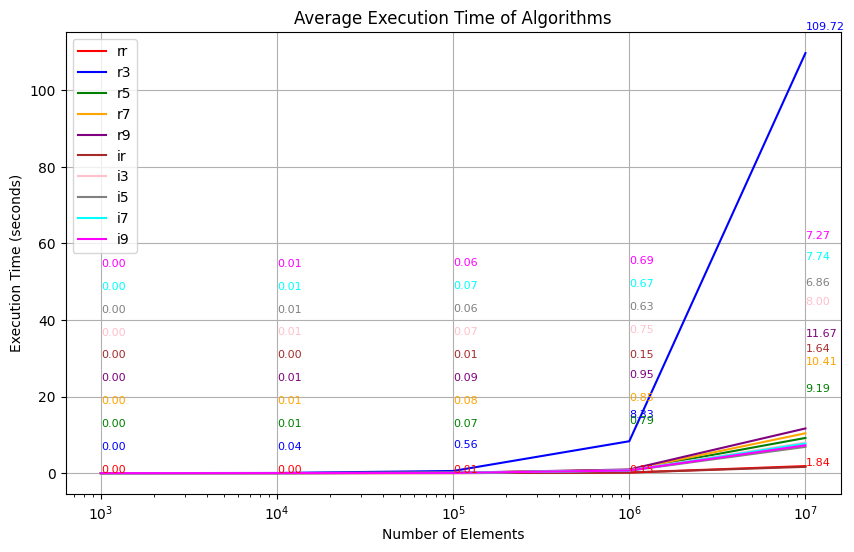

In [170]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple','brown','pink','gray','cyan','magenta'] 
Alo = ['rr','r3','r5','r7','r9','ir','i3','i5','i7','i9']
N2 = [1000,10000,100000,1000000,10000000]
for i in range(10):
    plt.plot(N2, All_avg[i], color=colors[i], label=f'{Alo[i]}')
    for j in range(len(N2)):
        y_offset = 2
        plt.text(N2[j], All_avg[i][j]+3*y_offset*i, f'{All_avg[i][j]:.2f}', fontsize=8, ha='left', color=colors[i])

plt.title('Average Execution Time of Algorithms')
plt.xlabel('Number of Elements')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.xticks(N2)
plt.grid(True)
plt.xscale('log')
plt.show()

In [164]:
print(f"RR={avg_rr_time[4]} , R3={avg_r3_time[4]} , R5={avg_r5_time[4]} , R7={avg_r7_time[4]} , R9={avg_r9_time[4]}")

RR=1.84 , R3=109.72 , R5=9.19 , R7=10.41 , R9=11.67


In [165]:
print(f"IR={avg_ir_time[4]} , I3={avg_i3_time[4]} , I5={avg_i5_time[4]} , I7={avg_i7_time[4]} , I9={avg_i9_time[4]}")

IR=1.64 , I3=8.0 , I5=6.86 , I7=7.74 , I9=7.27
